##**Aadhaar Card - Data Analysis Project(PySpark)**

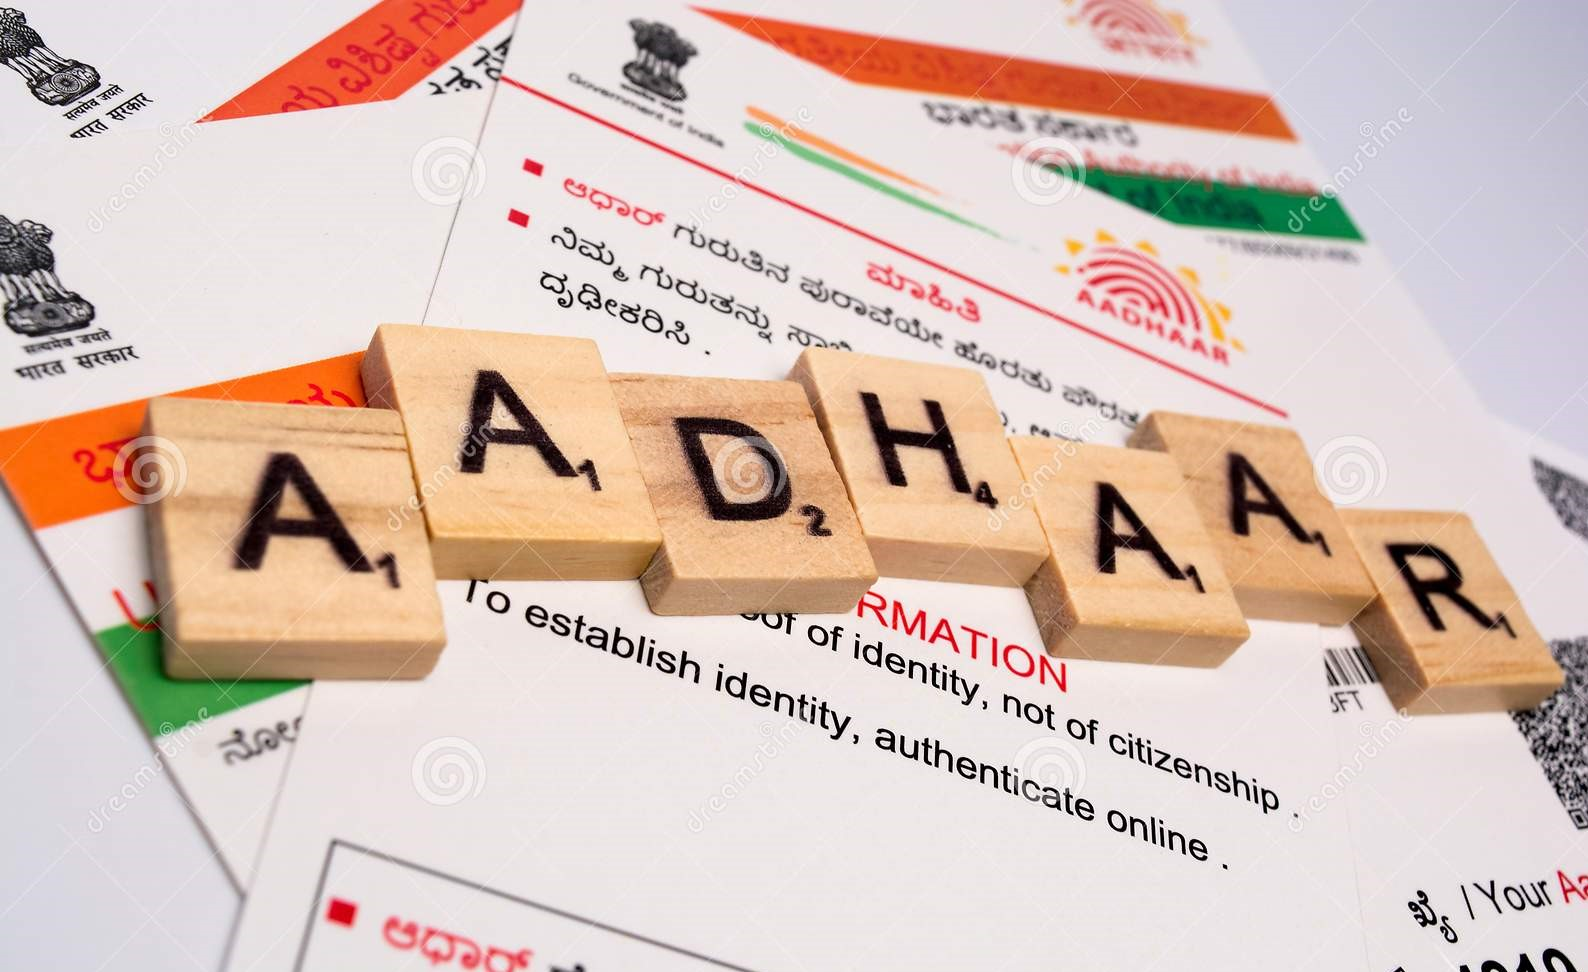

##**Introduction**
###What is Aadhaar?

Aadhaar is a 12-digit unique identity number that can be obtained voluntarily by residents or passport holders of India, based on their biometric and demographic data. The data is collected by the Unique Identification Authority of India (UIDAI), a statutory authority established in January 2009 by the government of India. Aadhaar is the world’s largest biometric ID system.

The Aadhaar card consists of key information on the person such as the name, gender, and date of birth in plain text as well as a QR code. UIDAI has introduced a new Secure QR Code which contains demographic details of a resident like name, address, date of birth, gender and masked Aadhaar number as well as a photograph of the Aadhaar number holder.
Analyzing a dataset from Aadhaar – a unique identity issued to all resident Indians.

The issuing authority – **UIDAI** provides a catalog of downloadable datasets collected at the national level.
Our dataset of interest is “Enrollments processed in detail".

###Contains following columns:

Registrar, Enrollment Agency, State, District, Sub District, Pin Code, Gender, Age, Aadhaar Generated, Enrollment Rejected, Residents providing email, Residents providing mobile number

Dimension of the Dataframe is: (440818, 12)
####Number of Rows are: **440818**
####Number of Columns are: **12**

In [10]:
pip install pyspark #Installation of PySpark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
#Importing dependencies and initializing PySpark
from pyspark import SparkContext, SparkConf #Creation of Spark Context
from pyspark.sql import SparkSession #Creation of Spark Session 
from pyspark.sql import SQLContext
#Spark Configuration
conf = SparkConf().setAppName("sample_app")
sc = SparkContext(conf=conf)
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
sqlContext = SQLContext(sc)


ValueError: ignored

In [35]:
sc #Checking the SparkContext imported

<SparkContext master=local[*] appName=sample_app>

In [49]:
import pyspark.sql.functions as f #importing the sql functions for analysis

In [50]:
from pyspark.sql.functions import sum, col, desc, asc, count #importing various functions required for analysis

In [15]:
file_location1 = "/content/UIDAI-ENR-DETAIL-20170308.csv" #Selecting the file required for EDA
#Creating a dataframe by reading a csv file
df1 = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file_location1) 

In [16]:
df1.show() #to display the dataframe imported

+--------------------+--------------------+-------------+----------+------------+--------+------+---+-----------------+------------------+-------------------------+---------------------------------+
|           Registrar|    Enrolment Agency|        State|  District|Sub District|Pin Code|Gender|Age|Aadhaar generated|Enrolment Rejected|Residents providing email|Residents providing mobile number|
+--------------------+--------------------+-------------+----------+------------+--------+------+---+-----------------+------------------+-------------------------+---------------------------------+
|      Allahabad Bank|A-Onerealtors Pvt...|Uttar Pradesh| Allahabad|        Meja|  212303|     F|  7|                1|                 0|                        0|                                1|
|      Allahabad Bank|Asha Security Gua...|Uttar Pradesh| Sonbhadra| Robertsganj|  231213|     M|  8|                1|                 0|                        0|                                0|
|    

In [17]:
df1.printSchema() #Checking various columns and their data types

root
 |-- Registrar: string (nullable = true)
 |-- Enrolment Agency: string (nullable = true)
 |-- State: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Sub District: string (nullable = true)
 |-- Pin Code: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Aadhaar generated: integer (nullable = true)
 |-- Enrolment Rejected: integer (nullable = true)
 |-- Residents providing email: integer (nullable = true)
 |-- Residents providing mobile number: integer (nullable = true)



In [18]:
df1.limit(5).toPandas() #To view the data in pandas dataframe format

,Registrar,Enrolment Agency,State,District,Sub District,Pin Code,Gender,Age,Aadhaar generated,Enrolment Rejected,Residents providing email,Residents providing mobile number
0,Allahabad Bank,A-Onerealtors Pvt Ltd,Uttar Pradesh,Allahabad,Meja,212303,F,7,1,0,0,1
1,Allahabad Bank,Asha Security Guard Services,Uttar Pradesh,Sonbhadra,Robertsganj,231213,M,8,1,0,0,0
2,Allahabad Bank,SGS INDIA PVT LTD,Uttar Pradesh,Sultanpur,Sultanpur,227812,F,13,1,0,0,1
3,Allahabad Bank,Sri Ramraja Sarkar Lok Kalyan Trust,Uttar Pradesh,Shamli,Shamli,247775,M,6,1,0,0,1
4,Allahabad Bank,Transmoovers India,Uttar Pradesh,Gorakhpur,Sahjanwa,273001,M,8,1,0,0,1


In [40]:
row = df1.count() # total number of rows in dataframe
  # extracting number of columns from the Dataframe
column = len(df1.columns) # total number of columns in dataframe
  # printing
print(f'Dimension of the Dataframe is: {(row,column)}')
print(f'Number of Rows are: {row}')
print(f'Number of Columns are: {column}')

Dimension of the Dataframe is: (440818, 12)
Number of Rows are: 440818
Number of Columns are: 12


###1) Create a dataframe with Total Aadhaar's generated for each state

In [41]:
aad_state = df1.groupBy("State").agg(sum("Aadhaar generated").alias("sum_aadhar")).sort(desc("sum_aadhar"))
#grouping data state wise
#summing all aadhar genrated and named as sum aadhar (to deal with ambiguity)
#arranging dataframe in descending order

In [45]:
aad_state.show(35,truncate=False) #display the total sum of aadhaar generated

+----------------------+----------+
|State                 |sum_aadhar|
+----------------------+----------+
|Bihar                 |162607    |
|West Bengal           |119901    |
|Uttar Pradesh         |103767    |
|Madhya Pradesh        |53276     |
|Rajasthan             |39570     |
|Gujarat               |34844     |
|Tamil Nadu            |32485     |
|Maharashtra           |26085     |
|Karnataka             |19764     |
|Odisha                |18182     |
|Kerala                |15143     |
|Uttarakhand           |13227     |
|Jharkhand             |9868      |
|Delhi                 |8426      |
|Haryana               |6804      |
|Chhattisgarh          |6604      |
|Punjab                |6506      |
|Mizoram               |6279      |
|Andhra Pradesh        |5798      |
|Telangana             |5018      |
|Assam                 |3213      |
|Himachal Pradesh      |1547      |
|Manipur               |1323      |
|Jammu and Kashmir     |1234      |
|Goa                   |1167

###2) Create a dataframe with the Total Aadhaar's generated by each enrollment agency

In [52]:
aadh_enrol_ag= df1.groupBy("Enrolment Agency").agg(sum("Aadhaar generated").alias("sum_aadhar")).sort(desc("sum_aadhar"
#grouping data enrollment agency wise
#summing all aadhar genrated and named as sum aadhar (to deal with ambiguity)
#arranging dataframe in descending order

In [54]:
aadh_enrol_ag.show(20,truncate=False) #display the result

+----------------------------------------+----------+
|Enrolment Agency                        |sum_aadhar|
+----------------------------------------+----------+
|CSC SPV                                 |173192    |
|Wipro Ltd                               |39619     |
|SREI INFRASTRUCTURE FINANCES L          |26497     |
|SRM Education And Social Welfare Society|26253     |
|Computer LAB                            |21823     |
|Rajcomp Info Services Ltd               |20163     |
|MPOnline Limited                        |17020     |
|AKSH OPTIFIBRE LIMITED                  |16624     |
|Nielsen  India  Private Limited         |15993     |
|TAMILNADU ARASU CABLE TV CORPORATION LTD|15981     |
|Akshaya                                 |14562     |
|CMS Computers Ltd                       |13126     |
|IAP COMPANY Pvt. Ltd                    |10644     |
|VEETECHNOLOGIES PVT. LTD                |9922      |
|NPS Technologies Pvt. Ltd               |9692      |
|Karvy Data Management Servi

###3) Create dataframe with the top 10 districts with maximum Aadhaar's generated for both Male and females?

In [21]:
df1.crosstab("District","Gender").show() #To display district and gender columns simulataneously

+--------------------+---+----+---+
|     District_Gender|  F|   M|  T|
+--------------------+---+----+---+
|           Chandauli|164| 418|  0|
|South West Khasi ...|  0|   1|  0|
|        Baloda Bazar| 79| 181|  0|
|               Panna|159| 327|  0|
|      East Champaran|966|2099|  0|
|            Puruliya|721| 762|  0|
|               Siang|  6|  32|  0|
|        Kamrup Metro| 44| 150|  0|
|               Surat|692|1270|  0|
|               Unnao|260| 529|  0|
|              Mandla|105| 259|  0|
|               Jalna|115| 179|  0|
|       Pauri Garhwal| 98| 360|  0|
|              Khunti| 25|  46|  0|
|             Nellore| 42| 143|  0|
|              Kanker| 38|  59|  0|
|          Villupuram|228| 457|  0|
|            Azamgarh|450|1017|  0|
|             Kurnool|107| 240|  0|
|             Koderma| 59|  89|  0|
+--------------------+---+----+---+
only showing top 20 rows



In [22]:
df1.filter("Gender <> 'T'").groupBy("District").agg(sum("Aadhaar generated").alias("sum_aadhar")).sort(desc("sum_aadhar")).show(truncate=False)
#filtering out transgenders
#summation of aadhaar for males and females only
#arranging the dataframe in descending order

+-----------------+----------+
|District         |sum_aadhar|
+-----------------+----------+
|South 24 Parganas|16207     |
|Barddhaman       |15821     |
|Bhagalpur        |14479     |
|North 24 Parganas|11272     |
|Gaya             |10755     |
|Katihar          |9479      |
|Patna            |8945      |
|Murshidabad      |8656      |
|Samastipur       |8230      |
|Nadia            |8162      |
|Jalpaiguri       |8094      |
|Munger           |7231      |
|Khagaria         |7209      |
|Paschim Medinipur|6432      |
|Kolkata          |6236      |
|West Champaran   |6041      |
|Bhojpur          |6014      |
|Howrah           |5681      |
|Sitamarhi        |5411      |
|Uttar Dinajpur   |5273      |
+-----------------+----------+
only showing top 20 rows



###a)Aadhaar generated for Males

In [23]:
max_aad_dist_male=df1.filter("Gender == 'M'").groupBy("District").agg(sum("Aadhaar generated").alias("sum_aadhar")).sort(desc("sum_aadhar"))
#filter data frame based on male 
#grouping data district wise
#summing all aadhar generated and named as sum aadhar (to deal with ambiguity)
#arranging dataframe in descending order

In [24]:
print('Top 10 districts with maximum Aadhaar generated for Male :')
max_aad_dist_male.show(10,truncate=False); #display top 10 districts

Top 10 districts with maximum Aadhaar generated for Male :
+-----------------+----------+
|District         |sum_aadhar|
+-----------------+----------+
|Bhagalpur        |11007     |
|South 24 Parganas|7825      |
|Katihar          |6968      |
|Murshidabad      |6808      |
|Samastipur       |6195      |
|Patna            |6191      |
|Barddhaman       |6077      |
|Gaya             |5959      |
|Munger           |5781      |
|Nadia            |5509      |
+-----------------+----------+
only showing top 10 rows



###b) Aadhaar generated for Females

In [25]:
max_aad_dist_female=df1.filter("Gender == 'F'").groupBy("District").agg(sum("Aadhaar generated").alias("sum_aadhar")).sort(desc("sum_aadhar"))
#filter data frame based on female 
#grouping data district wise
#summing all aadhar genrated and named as sum aadhar (to deal with ambiguity)
#arranging dataframe in descending order

In [26]:
print('Top 10 districts with maximum Aadhaar generated for Female :')
max_aad_dist_female.show(10,truncate=False); #display top 10 districts

Top 10 districts with maximum Aadhaar generated for Female :
+-----------------+----------+
|District         |sum_aadhar|
+-----------------+----------+
|Barddhaman       |9744      |
|South 24 Parganas|8382      |
|North 24 Parganas|6108      |
|Gaya             |4796      |
|Jalpaiguri       |4428      |
|Paschim Medinipur|3965      |
|Howrah           |3516      |
|Bhagalpur        |3472      |
|Budaun           |2905      |
|Banka            |2882      |
+-----------------+----------+
only showing top 10 rows



###4) Create a dataframe with Total Aadhaar generated for the top 10 least states

In [27]:
below_aadh_gen_state=df1.groupBy("State").agg(sum("Aadhaar generated").alias("sum_aadhar")).sort(asc("sum_aadhar"))
#grouping data state wise
#summing all aadhar generated and named as sum aadhar (to deal with ambiguity)
#arranging dataframe in ascending order

In [28]:
print('Below 10 districts with least Aadhaar generated(Incude Both UT and State and Others ) : ')
below_aadh_gen_state.show(10,truncate=False) #display top 10 least states and UTs

Below 10 districts with least Aadhaar generated(Incude Both UT and State and Others ) : 
+---------------------------+----------+
|State                      |sum_aadhar|
+---------------------------+----------+
|Lakshadweep                |4         |
|Andaman and Nicobar Islands|5         |
|Others                     |12        |
|Sikkim                     |50        |
|Puducherry                 |83        |
|Daman and Diu              |105       |
|Dadra and Nagar Haveli     |140       |
|Chandigarh                 |259       |
|Meghalaya                  |277       |
|Nagaland                   |545       |
+---------------------------+----------+
only showing top 10 rows



In [55]:
states=[i[0] for i in df1.select('State').distinct().collect()] #list of distinct values
l=['Jammu and Kashmir',
 'Dadra and Nagar Haveli',
 'Puducherry',
 'Delhi',
 'Others',
 'Chandigarh',
 'Andaman and Nicobar Islands',
 'Daman and Diu',
 'Lakshadweep'] # list contain UTs and others
only_state = df1.filter(~df1.State.isin(l)) # filter based on not present in list l
only_state_below_aadh_gen_state=only_state.groupBy("State").agg(sum("Aadhaar generated").alias("sum_aadhar")).sort(asc("sum_aadhar"))

In [56]:
print('Below 10 districts with least Aadhaar generated(Incude Only States ) : ')
only_state_below_aadh_gen_state.show(10,truncate=False) #Display of only states

Below 10 districts with least Aadhaar generated(Incude Only States ) : 
+-----------------+----------+
|State            |sum_aadhar|
+-----------------+----------+
|Sikkim           |50        |
|Meghalaya        |277       |
|Nagaland         |545       |
|Tripura          |908       |
|Arunachal Pradesh|913       |
|Goa              |1167      |
|Manipur          |1323      |
|Himachal Pradesh |1547      |
|Assam            |3213      |
|Telangana        |5018      |
+-----------------+----------+
only showing top 10 rows



###5) For which age, most Aadhar cards have declined?

In [31]:
aad_decl_age=df1.filter(col("Aadhaar generated") == 0).groupBy("Age").agg(count("Aadhaar generated").alias("count aadhar")).sort(desc("count aadhar"))
#fiter data frame based on aadhar generated 
#grouping data age wise
#counting all aadhar generated and named as count aadhar (to deal with ambiguity)
#arranging dataframe in descending order

In [32]:
aad_decl_age.show(10,truncate=False) #display top ages

+---+------------+
|Age|count aadhar|
+---+------------+
|4  |1729        |
|3  |1492        |
|2  |1389        |
|1  |1294        |
|0  |1087        |
|5  |863         |
|6  |794         |
|7  |724         |
|8  |612         |
|9  |529         |
+---+------------+
only showing top 10 rows

